In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def imshow(images, figsize=(10, 5)):
  image_num = len(images)
  plt.figure(figsize=figsize)
  for i in range(image_num):
    plt.subplot(1, image_num, i+1)
    plt.imshow(images[i], cmap='gray')

# Geometric Translations

## Translation from scratch

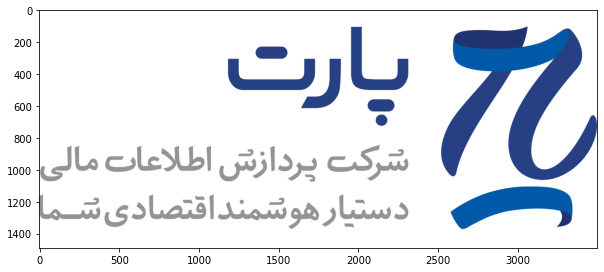

In [ ]:
image = cv2.cvtColor(cv2.imread('./part-logo.jpg'), 4)
imshow([image])

In [ ]:
height, width, _ = image.shape

In [ ]:
point = np.reshape(np.indices((width, height)), (2, -1))
point[:, :5]

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4]])

In [ ]:
ones = np.ones((1, point.shape[1]))
point = np.vstack((point, ones))
point[:, :5]

array([[0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4.],
       [1., 1., 1., 1., 1.]])

In [ ]:
M = np.array([[1, 0 , 100], [0, 1, 200], [0, 0, 1]], np.float32)
M

array([[  1.,   0., 100.],
       [  0.,   1., 200.],
       [  0.,   0.,   1.]], dtype=float32)

In [ ]:
transform_point = np.linalg.inv(M) @ point
transform_point[:, :5]

array([[-100., -100., -100., -100., -100.],
       [-200., -199., -198., -197., -196.],
       [   1.,    1.,    1.,    1.,    1.]])

In [ ]:
index = np.all((transform_point[0] > 0, transform_point[1] > 0,
                transform_point[0] < width, transform_point[1] < height), axis=0)
index

array([False, False, False, ...,  True,  True,  True])

In [ ]:
point = np.int32(point)
transform_point = np.int32(transform_point)

In [ ]:
output_img = np.zeros_like(image)

In [ ]:
output_img[point[1, index], point[0, index]] = image[transform_point[1, index], transform_point[0, index]]

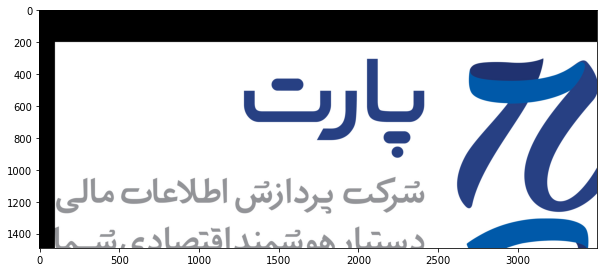

In [ ]:
imshow([output_img])

In [ ]:
# Using opencv built-in function
M = np.array([[1, 0, 100], [0, 1, 200]], np.float32()) # Because opencv function is requaired 3x2
M
output_img = cv2.warpAffine(image, M, (width, height))

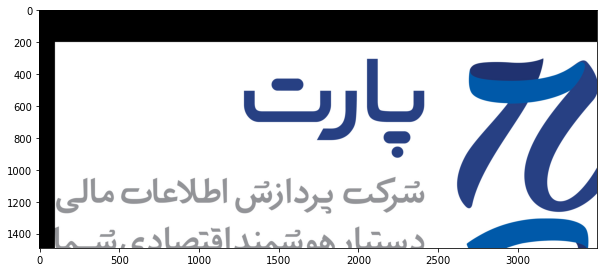

In [ ]:
imshow([output_img])

## Rotation

In [ ]:
M = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), 10, 1)
M

array([[ 9.84807753e-01,  1.73648178e-01, -1.02607812e+02],
       [-1.73648178e-01,  9.84807753e-01,  3.15187343e+02]])

In [ ]:
output_img = cv2.warpAffine(image, M, (width, height))

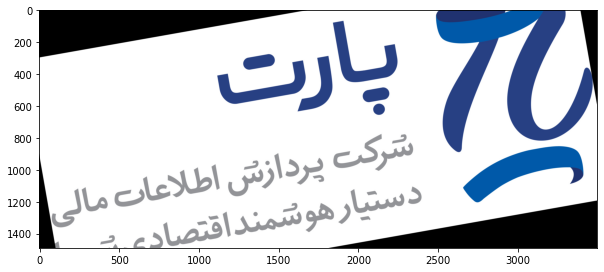

In [ ]:
imshow([output_img])

## Scale

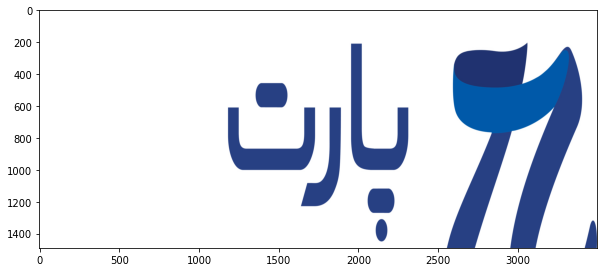

In [ ]:
M = np.array([[1, 0, 0], [0, 2, 0]], np.float32)

output_img = cv2.warpAffine(image, M, (width, height))
imshow([output_img])

## Transform on image

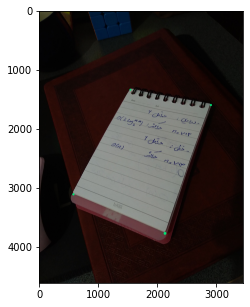

In [ ]:
image = cv2.imread('./transform.jpg')
imshow([cv2.cvtColor(image, 4)])

In [ ]:
in_points = np.array([[1500, 1400], [2700, 1600], [700, 3100]], np.float32)
in_points

array([[1500., 1400.],
       [2700., 1600.],
       [2300., 3800.]], dtype=float32)

In [ ]:
out_points = np.array([[0, 0], [image.shape[1], 0], [image.shape[1], image.shape[0]]], np.float32)
out_points

array([[   0.,    0.],
       [3456.,    0.],
       [3456., 4608.]], dtype=float32)

In [ ]:
M = cv2.getAffineTransform(in_points, out_points)
M

array([[ 2.79529412e+00,  5.08235294e-01, -4.90447059e+03],
       [-3.38823529e-01,  2.03294118e+00, -2.33788235e+03]])

In [ ]:
output_img = cv2.warpAffine(image, M, (image.shape[0], image.shape[1]))

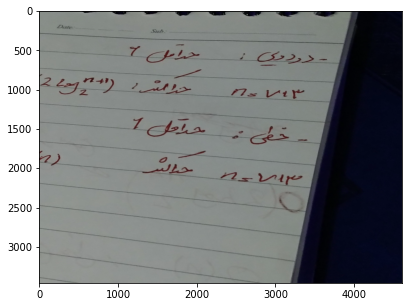

In [ ]:
imshow([output_img])